# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from matplotlib import style
style.use('dark_background')

In [2]:
# Reading application data

application_data=pd.read_csv(r'E:\Vidya_DS\Credit EDA Case Study\application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Analyzing Application data

In [3]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
application_data.shape

(307511, 122)

In [5]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
application_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
application_data.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


In [9]:
application_data.isnull().values.any()

True

# Distribution of Target Variable

In [10]:
defaulters=application_data[application_data.TARGET==1]
non_defaulters=application_data[application_data.TARGET==0]

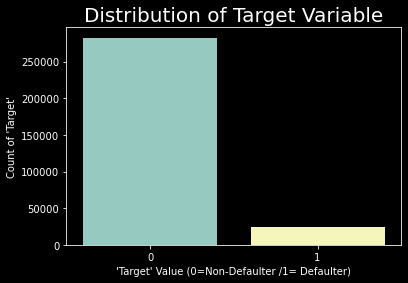

In [11]:
sns.countplot(application_data.TARGET)

plt.xlabel("'Target' Value (0=Non-Defaulter /1= Defaulter)")
plt.ylabel("Count of 'Target'")
plt.title('Distribution of Target Variable', fontdict= {'fontsize':20,'fontweight':10})
plt.show()

## Inference:

From this bar graph, we can clearly see an imbalance, i.e., there are far more loans that were repaid on time than the loans that were not repaid on time. In terms of numbers, more than 25000 loans were repaid, Less than 5000 loans were not repaid.

In [12]:
percentage_defaulters=(len(defaulters)*100)/len(application_data)
percentage_nondefaulters=(len(non_defaulters)*100)/len(application_data)

print("The Percentage of people who have paid their loan (Non-Defaulters):",round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan (Defaulters):",round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance:",round(len(non_defaulters)/len(defaulters),2))

The Percentage of people who have paid their loan (Non-Defaulters): 91.93 %
The Percentage of people who have NOT paid their loan (Defaulters): 8.07 %
The Ratio of Data Imbalance: 11.39


# Identifying missing values

In [13]:
# Defining a function to calculate missing-data to identify % of data missing in each column

def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    datatypes = data.dtypes
    return pd.concat([total, percent, datatypes], axis=1, keys=['Total', 'Percent', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [14]:
# Calculating missing-data for application_data

app_meta_data= meta_data(application_data)
app_meta_data.head(30)

,Total,Percent,Data_Type
COMMONAREA_MEDI,214865,69.872297,float64
COMMONAREA_AVG,214865,69.872297,float64
COMMONAREA_MODE,214865,69.872297,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,float64
FONDKAPREMONT_MODE,210295,68.386172,object
LIVINGAPARTMENTS_MODE,210199,68.354953,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,float64
LIVINGAPARTMENTS_MEDI,210199,68.354953,float64


## Step Taken:

Dropping columns with High Missing Values above 30%

In [15]:
# listing the null value columns having more than 30%

empty_col=application_data.isnull().sum()
empty_col=empty_col[empty_col.values>(0.3*len(empty_col))]
len(empty_col)

64

In [16]:
# Removing those 64 columns

empty_col = list(empty_col[empty_col.values>=0.3].index)
application_data.drop(labels=empty_col,axis=1,inplace=True)
print(len(empty_col))

64


In [17]:
# Checking the columns having less null percentage

application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


# Outlier Analysis

### Check for outliers in column 'AMT_ANNUITY'

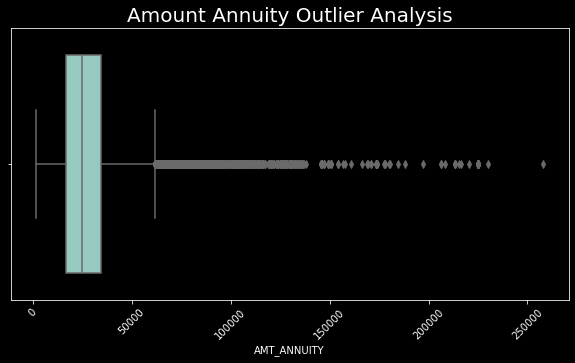

In [18]:
plt.figure (figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Amount Annuity Outlier Analysis', fontdict= {'fontsize':20,'fontweight':10})

sns.boxplot(data= application_data, x='AMT_ANNUITY')
plt.show()

## Step Taken: 

According to the previous evaluation, 'AMT_ANNUITY' column has very few null values. Hence, we try to impute the missing values. Since this column is having an outlier which is very large it will not be appropriate to fill those missing values with mean value. Hence, we compute median and fill those missing banks with it.

In [19]:
# Filling missing values with median

values=application_data['AMT_ANNUITY'].median()

application_data.loc[application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [20]:
# Searching for the column for null values

application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [21]:
# Removing rows having null values greater than or equal to 30%

empty_row=application_data.isnull().sum(axis=1)
empty_row=list(empty_row[empty_row.values>=0.3*len(application_data)].index)
application_data.drop(labels=empty_row,axis=0,inplace=True)
print(len(empty_row))

0


# Dropping unwanted columns

## Step Taken:

The following labels are not necessary according to us for the analysis as it does not directly impact it.

In [22]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_data.drop(labels=unwanted,axis=1,inplace=True)

In [23]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,Religion


In [24]:
application_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
ORGANIZATION_TYPE             0
dtype: int64

# 'XNA' values analysis ( 'XNA' ='Not Available')

##### Gender column

In [25]:
# Describing the Gender column to check the number of females and males

application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

## Step Taken:

Since, the number of XNAs are just 4, we drop these values as it won't affect the analysis in any way.

In [26]:
application_data=application_data.drop(application_data.loc[application_data['CODE_GENDER']=='XNA'].index)
application_data[application_data['CODE_GENDER']=='XNA'].shape

(0, 22)

In [27]:
application_data['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

##### Organization type  column

In [28]:
# Describing the organization type column

application_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

## Step Taken:

Since, the number of XNAs are just 55374, we drop these values as it won't affect the analysis in any way.

In [29]:
application_data=application_data.drop(application_data.loc[application_data['ORGANIZATION_TYPE']=='XNA'].index)
application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 22)

In [30]:
application_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### Revised Application data

In [31]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,Religion


# Variables we will focus on, for the analysis with data types

In [32]:
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
ORGANIZATION_TYPE              object
dtype: object

# Creating Bins for continuous variable

##### Income Column

In [33]:
# Creating bins for income amount

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000],labels=['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']) 

##### Credit amount Column

In [34]:
# Describing Credit column for creating bins

application_data['AMT_CREDIT'].describe()

count    2.521330e+05
mean     6.114018e+05
std      4.065294e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [35]:
# Creating bins for credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000','800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

##### Annuity amount Column

In [36]:
# Describing annuity column for creating bins

application_data['AMT_ANNUITY'].describe()

count    252133.000000
mean      27812.311137
std       14647.494688
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [37]:
# Creating bins for annuity columns

label=['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000 and above']

application_data['AMT_ANNUITY_RANGE']=pd.cut(application_data['AMT_ANNUITY'],bins=[0,50000,100000,150000,200000,250000,500000],labels=label)

# Univariate analysis

##### Income Column

In [38]:
# Non-Graphical Univariate Analysis

application_data['AMT_INCOME_RANGE'].value_counts()

100000-150000       74669
150000-200000       55187
200000-250000       42475
50000-100000        41689
250000-300000       15234
300000-350000        8121
350000-400000        5317
400000-450000        4515
500000 and above     2543
0-50000              1982
450000-500000         401
Name: AMT_INCOME_RANGE, dtype: int64

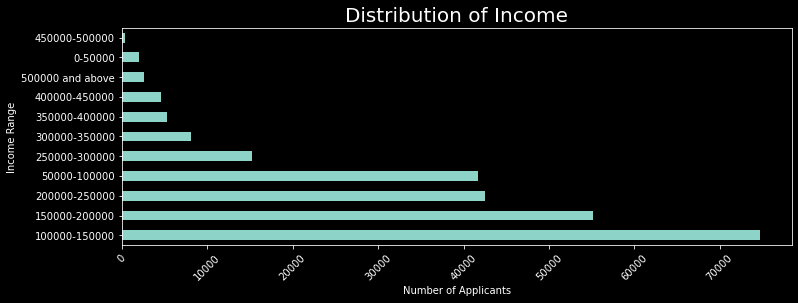

In [39]:
# Graphical Univariate Analysis

plt.figure (figsize=(12,4))
plt.xticks(rotation=45)
plt.xlabel("Number of Applicants")
plt.ylabel("Income Range")

plt.title('Distribution of Income', fontdict= {'fontsize':20,'fontweight':10})

(application_data['AMT_INCOME_RANGE'].value_counts()).plot.barh()
plt.show()

## Inference:

Majority applicants are have an income in the range of 100000-150000

##### Credit amount Column

In [40]:
# Non-Graphical Univariate Analysis

application_data['AMT_CREDIT_RANGE'].value_counts()

900000 and above    50717
250000-300000       24960
500000-550000       18433
200000-250000       17502
400000-450000       15853
150000-200000       14867
0-150000            13502
300000-350000       13487
650000-700000       12142
450000-500000       11254
750000-800000        9770
550000-600000        9489
800000-850000        9439
850000-900000        9100
350000-400000        8398
600000-650000        7571
700000-750000        5649
Name: AMT_CREDIT_RANGE, dtype: int64

<AxesSubplot:title={'center':'Distribution of Credit Amount'}, xlabel='Number of Applicants', ylabel='Credit amount Range'>

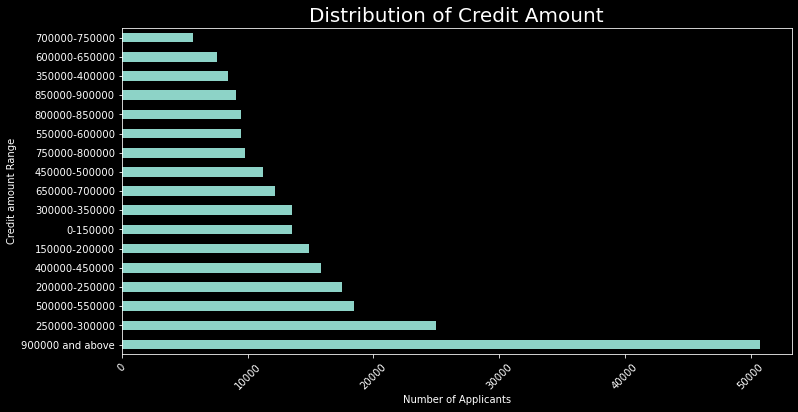

In [41]:
# Graphical Univariate Analysis

plt.figure (figsize=(12,6))
plt.xticks(rotation=45)
plt.xlabel("Number of Applicants")
plt.ylabel("Credit amount Range")

plt.title('Distribution of Credit Amount', fontdict= {'fontsize':20,'fontweight':10})

(application_data['AMT_CREDIT_RANGE'].value_counts()).plot.barh()

## Inference:

Majority applicants are have a credit amount in the range of 900000 and above. This infers that applicants are availing loans for larger purchases. 

##### Annuity amount Column

In [42]:
# Non-Graphical Univariate Analysis

application_data['AMT_ANNUITY_RANGE'].value_counts()

0-50000             233281
50000-100000         18422
100000-150000          369
200000-250000           32
150000-200000           28
250000 and above         1
Name: AMT_ANNUITY_RANGE, dtype: int64

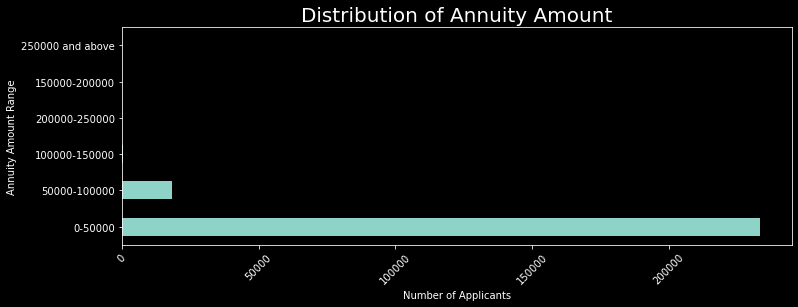

In [43]:
# Graphical Univariate Analysis

plt.figure (figsize=(12,4))
plt.xticks(rotation=45)
plt.xlabel("Number of Applicants")
plt.ylabel("Annuity Amount Range")

plt.title('Distribution of Annuity Amount', fontdict= {'fontsize':20,'fontweight':10})
(application_data['AMT_ANNUITY_RANGE'].value_counts()).plot.barh()
plt.show()

## Inference:

Majority applicants are have annuity amounts in the range of 0-50000 which could infer that the loans are availed for longer years of repayment

##### Gender Column

In [44]:
# Non-Graphical Univariate Analysis

application_data['CODE_GENDER'].value_counts()

F    157177
M     94956
Name: CODE_GENDER, dtype: int64

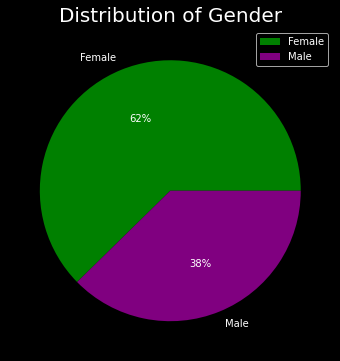

In [45]:
# Graphical Univariate Analysis

plt.figure (figsize=(12,6))
plt.title('Distribution of Gender', fontdict= {'fontsize':20,'fontweight':10})
colors = ["green", "purple"]
plt.pie((application_data['CODE_GENDER'].value_counts())/len(application_data['CODE_GENDER']), labels=['Female','Male'], autopct='%1.0f%%',colors=colors)
plt.legend(loc="upper right")
plt.show()

## Inference:

Majority loan applicants are Females

##### Age Column

In [46]:
# Deriving new metric Age from Days Birth

application_data['AGE'] = application_data['DAYS_BIRTH'] / -365

# Non-Graphical Univariate Analysis

application_data['AGE'].describe()

count    252133.000000
mean         40.463431
std          10.034418
min          20.517808
25%          32.260274
50%          39.926027
75%          48.117808
max          69.041096
Name: AGE, dtype: float64

In [47]:
# Describing Age in years in the form of bins

label=['0-10','10-20','20-30','30-40','40-50','50-60','60 and above']

application_data['AGE_RANGE']=pd.cut(application_data['AGE'],bins=[0,10,20,30,40,50,60,100],labels=label)
application_data['AGE_RANGE'].value_counts()

30-40           81805
40-50           74718
20-30           44883
50-60           44726
60 and above     6001
10-20               0
0-10                0
Name: AGE_RANGE, dtype: int64

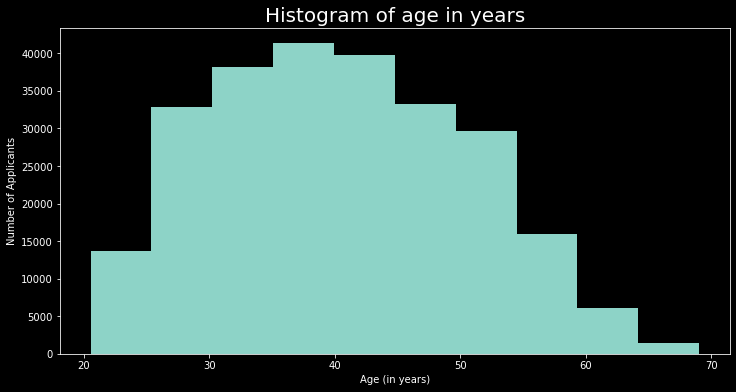

In [48]:
# Graphical Univariate Analysis

# Before bins

plt.figure (figsize=(12,6))
plt.xlabel("Age (in years)")
plt.ylabel("Number of Applicants")
plt.title('Histogram of age in years', fontdict= {'fontsize':20,'fontweight':10})
plt.hist(application_data['AGE'])
plt.show()

## Inference:

Age seems to be fairly distributed

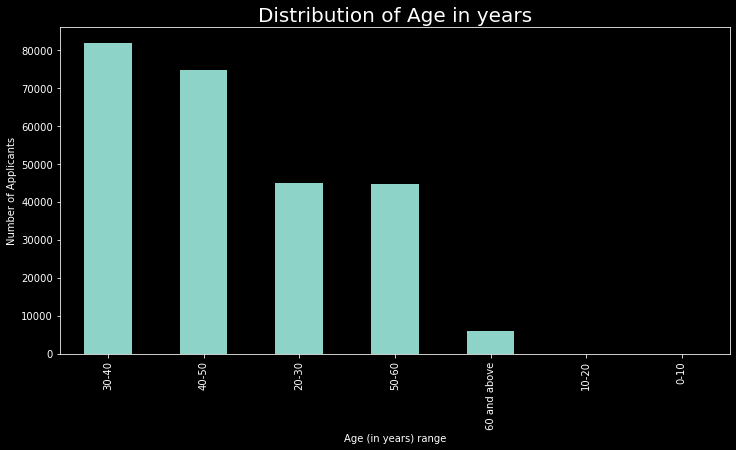

In [49]:
# After bins

plt.figure (figsize=(12,6))
plt.xlabel("Age (in years) range")
plt.ylabel("Number of Applicants")
plt.title('Distribution of Age in years', fontdict= {'fontsize':20,'fontweight':10})
(application_data['AGE_RANGE'].value_counts()).plot.bar()
plt.show()

## Inference:

Majority applicants are from the age group 30-40

##### Education Column

In [50]:
# Non-Graphical Univariate Analysis

application_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    173284
Higher education                  66668
Incomplete higher                  9756
Lower secondary                    2287
Academic degree                     138
Name: NAME_EDUCATION_TYPE, dtype: int64

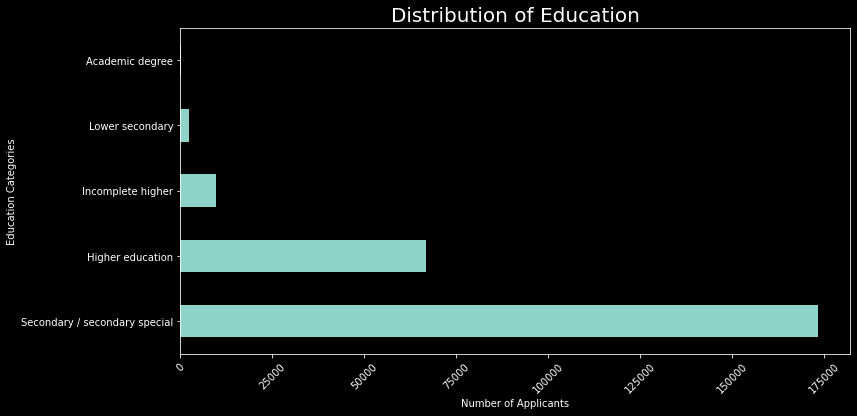

In [51]:
# Graphical Univariate Analysis

plt.figure (figsize=(12,6))
plt.xticks(rotation=45)
plt.xlabel("Number of Applicants")
plt.ylabel("Education Categories")
plt.title('Distribution of Education', fontdict= {'fontsize':20,'fontweight':10})
(application_data['NAME_EDUCATION_TYPE'].value_counts()).plot.barh()
plt.show()

## Inference:

Majority applicants atleast have completed secondary education

##### Family status Column

In [52]:
# Non-Graphical Univariate Analysis

application_data['NAME_FAMILY_STATUS'].value_counts()

Married                 163911
Single / not married     39316
Civil marriage           26196
Separated                16000
Widow                     6708
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

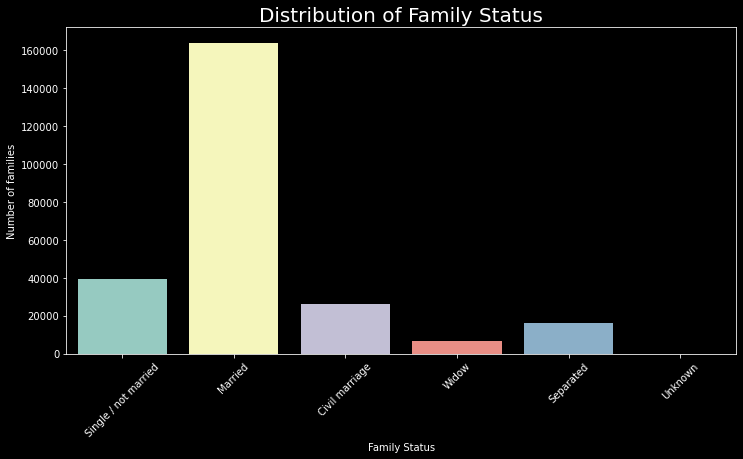

In [53]:
# Graphical Univariate Analysis

plt.figure (figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(application_data.NAME_FAMILY_STATUS)

plt.xlabel("Family Status")
plt.ylabel("Number of families")
plt.title('Distribution of Family Status', fontdict= {'fontsize':20,'fontweight':10})
plt.show()

## Inference:

Majority applicants are married with or without children

##### Housing Type Column

In [54]:
# Non-Graphical Univariate Analysis

application_data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      220480
With parents            14621
Municipal apartment      9049
Rented apartment         4676
Office apartment         2301
Co-op apartment          1006
Name: NAME_HOUSING_TYPE, dtype: int64

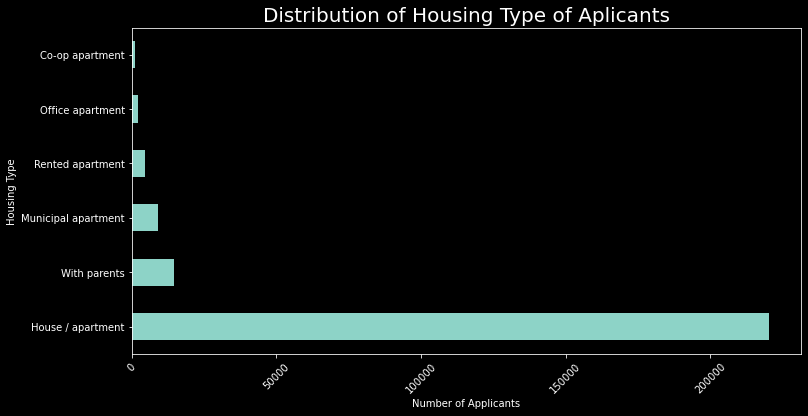

In [55]:
# Graphical Univariate Analysis

plt.figure (figsize=(12,6))
plt.xticks(rotation=45)
plt.xlabel("Number of Applicants")
plt.ylabel("Housing Type")
plt.title('Distribution of Housing Type of Aplicants', fontdict= {'fontsize':20,'fontweight':10})
(application_data['NAME_HOUSING_TYPE'].value_counts()).plot.barh()
plt.show()

## Inference:

Majority applicants own a house/ apartment which could infer that the majority loans are not for housing.

##### Organization Type Column

In [56]:
# Non-Graphical Univariate Analysis

application_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

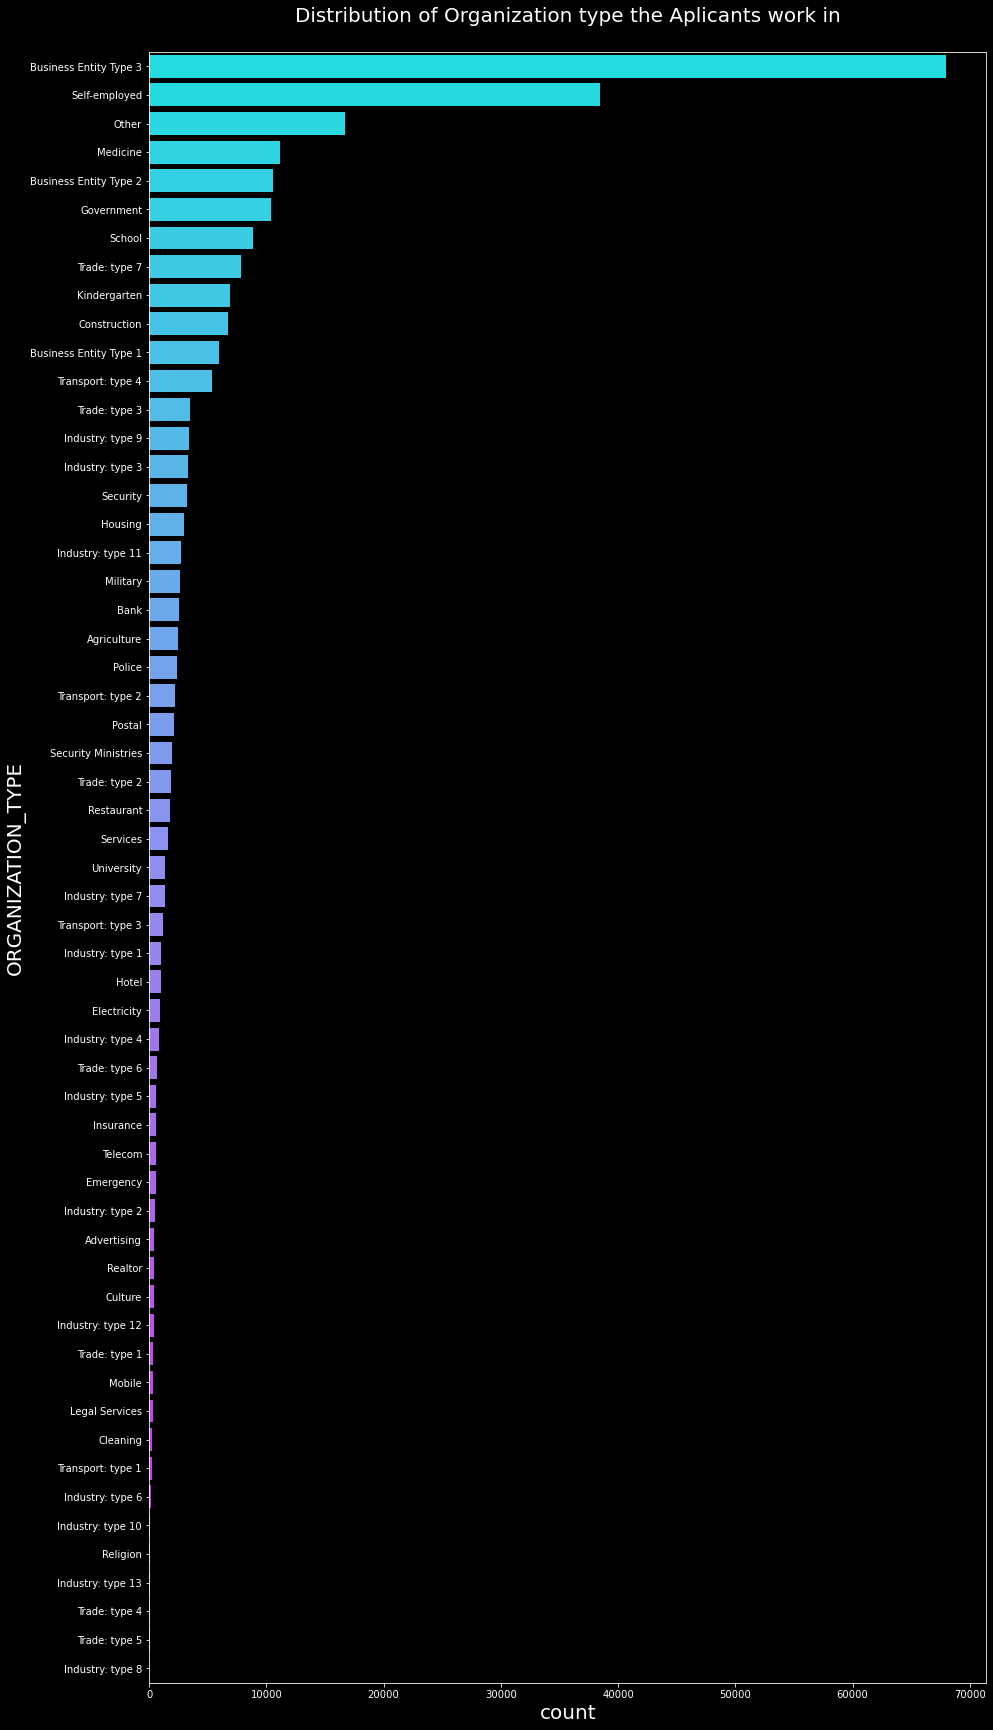

In [57]:
# Graphical Univariate Analysis

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title('Distribution of Organization type the Aplicants work in', fontdict= {'fontsize':20,'fontweight':10})

sns.countplot(data=application_data ,y='ORGANIZATION_TYPE',order=application_data['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()

## Inference:

Majority applicants are business professionals and are involved in corporations, LLPs or partnerships. These applicants require huge business capital.

# Bivariate Analysis

## Target Variable 

In [58]:
# Dividing the dataset into two dataset of target=1(client with payment difficulties) and target=0(all other)

defaulters=application_data[application_data.TARGET==1]
non_defaulters=application_data[application_data.TARGET==0]

## Categorical Analysis using Target variable (Defaulters and Non-defaulters)

In [59]:
def uniplot(df,col,title,hue =None):
    
    style.use('dark_background')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.titlepad'] = 20
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    fig.set_size_inches(12 , 6)
    plt.title(title)
    plt.xticks(rotation=290)
    plt.yscale('log')

    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

### Income Variable w.r.t Gender who are Non- Defaulters

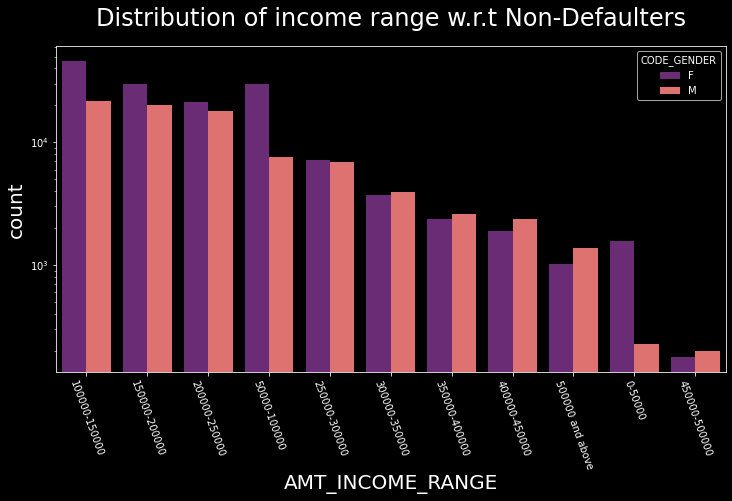

In [60]:
uniplot(non_defaulters, col='AMT_INCOME_RANGE',title='Distribution of income range w.r.t Non-Defaulters',hue='CODE_GENDER')

### Income Variable w.r.t Gender who are Defaulters

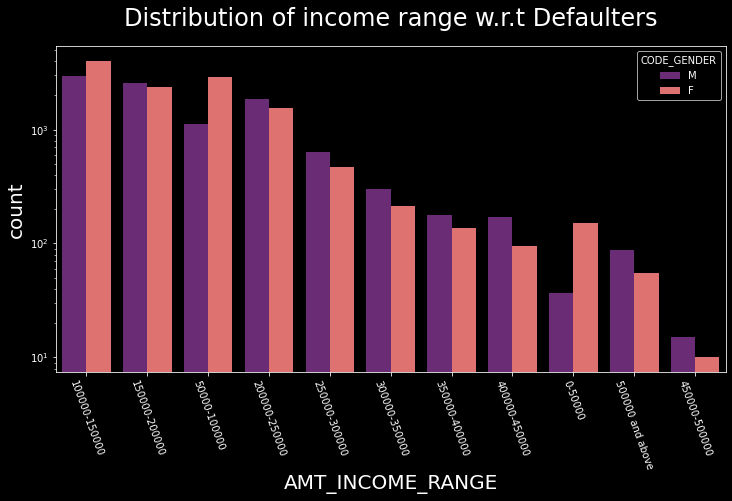

In [61]:
uniplot(defaulters, col='AMT_INCOME_RANGE',title='Distribution of income range w.r.t Defaulters',hue='CODE_GENDER')

## Inference (Income Variable):

From the above analysis, we can infer that amoung the non-defaulters, females have the majority with an income range of 100000-150000. Also, female applicants comprise of higher number of defaulters from the same income bracket.

### Credit Amount Variable w.r.t Gender who are Non- Defaulters

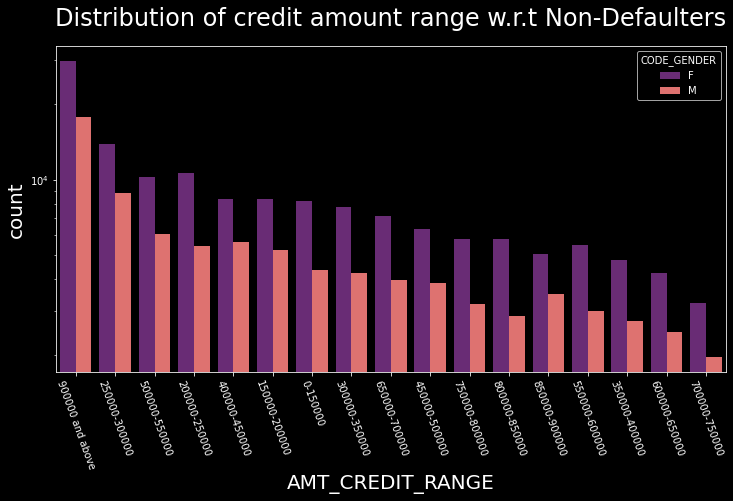

In [62]:
uniplot(non_defaulters, col='AMT_CREDIT_RANGE',title='Distribution of credit amount range w.r.t Non-Defaulters',hue='CODE_GENDER')

### Credit Amount Variable w.r.t Gender who are Defaulters

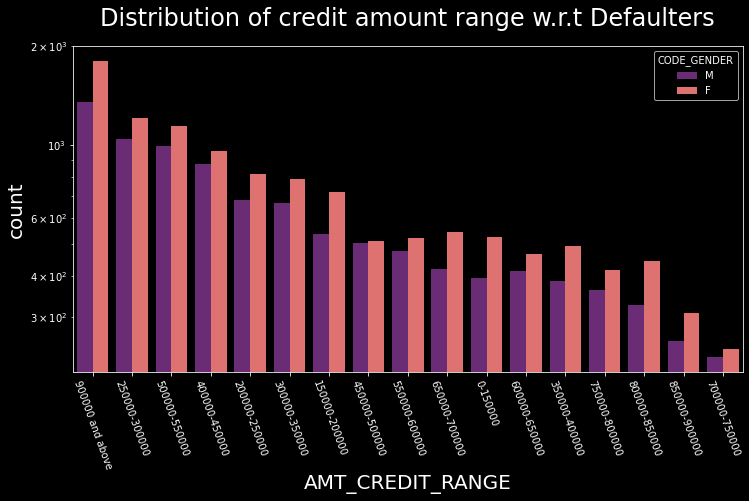

In [63]:
uniplot(defaulters, col='AMT_CREDIT_RANGE',title='Distribution of credit amount range w.r.t Defaulters',hue='CODE_GENDER')

## Inference (Credit Amount):

From the above analysis, we can infer that amoung the non-defaulters, females have the majority with the highest credit range of 900000 and above. Also, female applicants comprise of higher number of defaulters from the same credit range.

### Annuity Amount Variable w.r.t Gender who are non-Defaulters

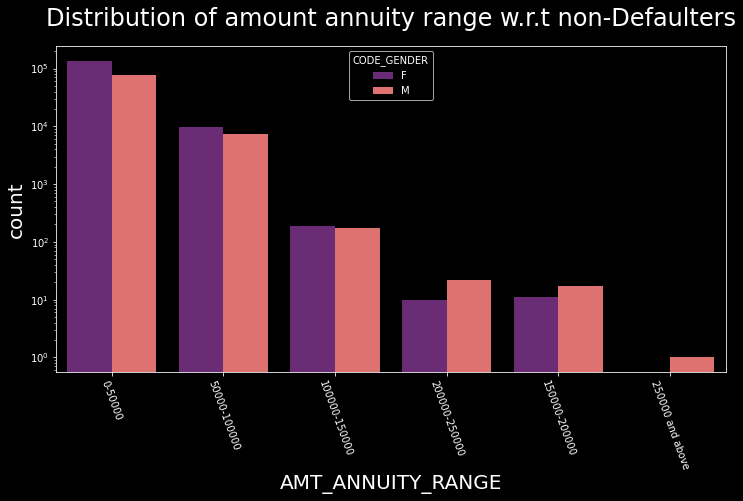

In [64]:
uniplot(non_defaulters, col='AMT_ANNUITY_RANGE',title='Distribution of amount annuity range w.r.t non-Defaulters',hue='CODE_GENDER')

### Annuity Amount Variable w.r.t Gender who are Defaulters

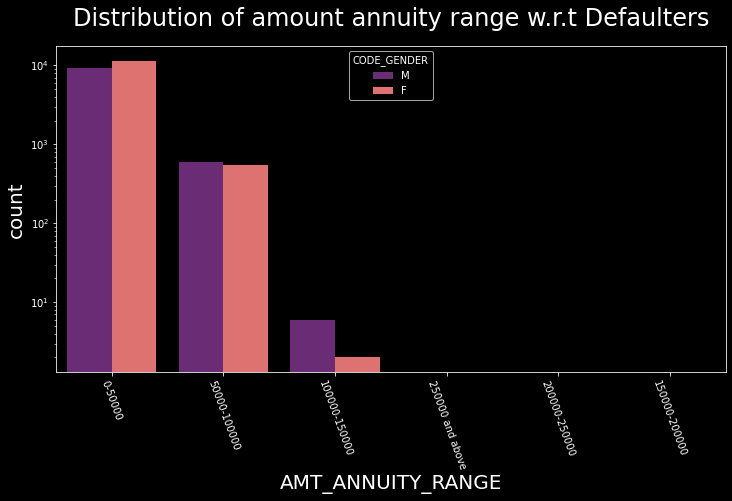

In [65]:
uniplot(defaulters, col='AMT_ANNUITY_RANGE',title='Distribution of amount annuity range w.r.t Defaulters',hue='CODE_GENDER')

## Inference (Annuity): 

From the above analysis, we can infer that amoung the non-defaulters, females have the majority with the lowest annuity amounts in the range of 0-50000. Also, female applicants comprise of higher number of defaulters from the same annuity ranges.

### Contract Type Variable w.r.t Gender who are non-Defaulters

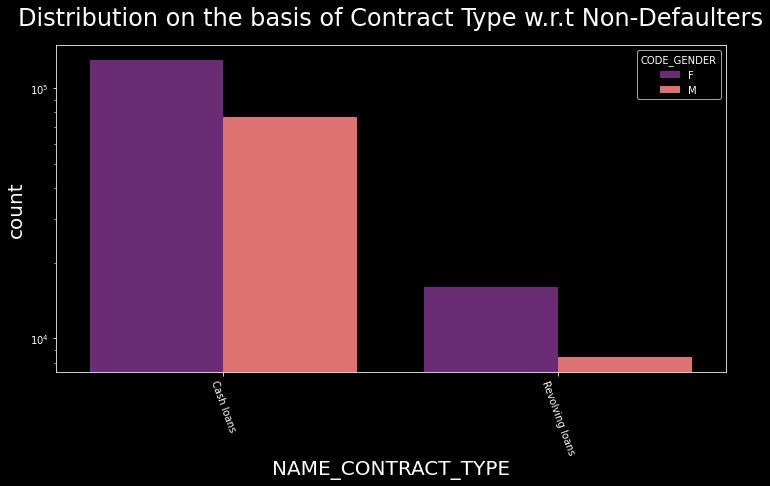

In [66]:
uniplot(non_defaulters, col='NAME_CONTRACT_TYPE',title='Distribution on the basis of Contract Type w.r.t Non-Defaulters',hue='CODE_GENDER')

### Contract Type Variable w.r.t Gender who are Defaulters

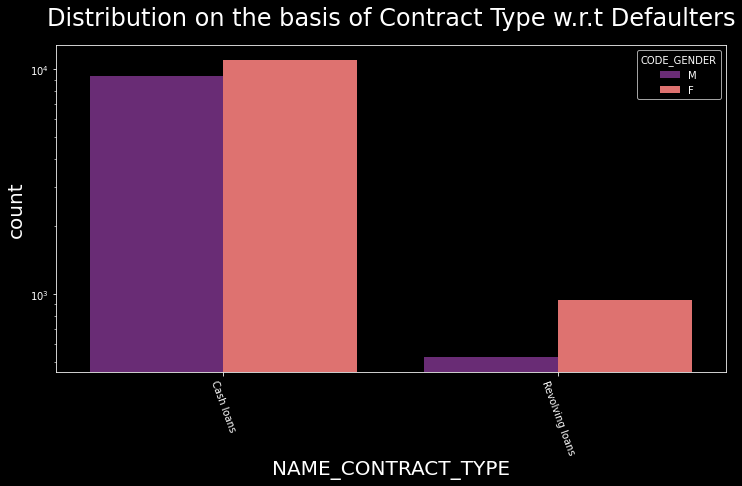

In [67]:
uniplot(defaulters, col='NAME_CONTRACT_TYPE',title='Distribution on the basis of Contract Type w.r.t Defaulters',hue='CODE_GENDER')

## Inference (Contract Type):

In case of Cash loans, females have availed the highest number of loans with highest default and timely payments. Similarly, for revolving loans, females have availed the highest number of loans with highest default and timely payments.

### Organisation Type Variable w.r.t Non-Defaulters

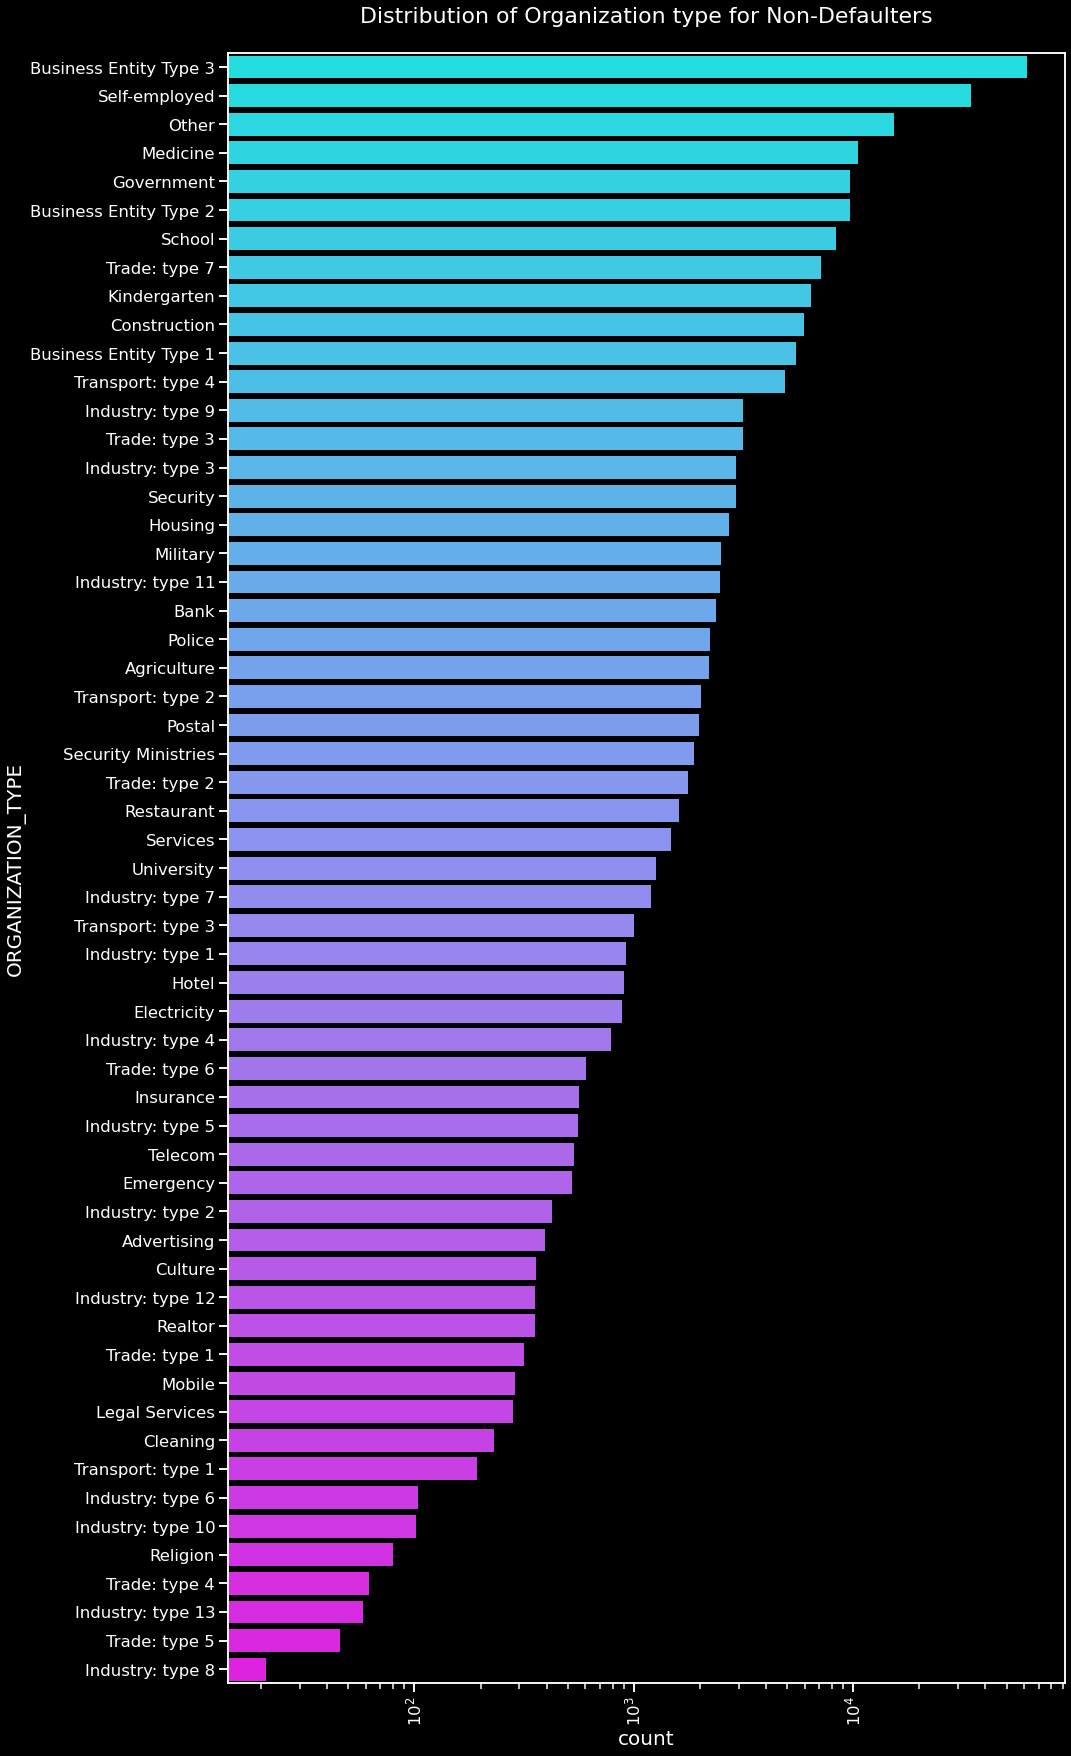

In [68]:
style.use('dark_background')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for Non-Defaulters")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=non_defaulters,y='ORGANIZATION_TYPE',order=non_defaulters['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

### Organisation Type Variable w.r.t Defaulters

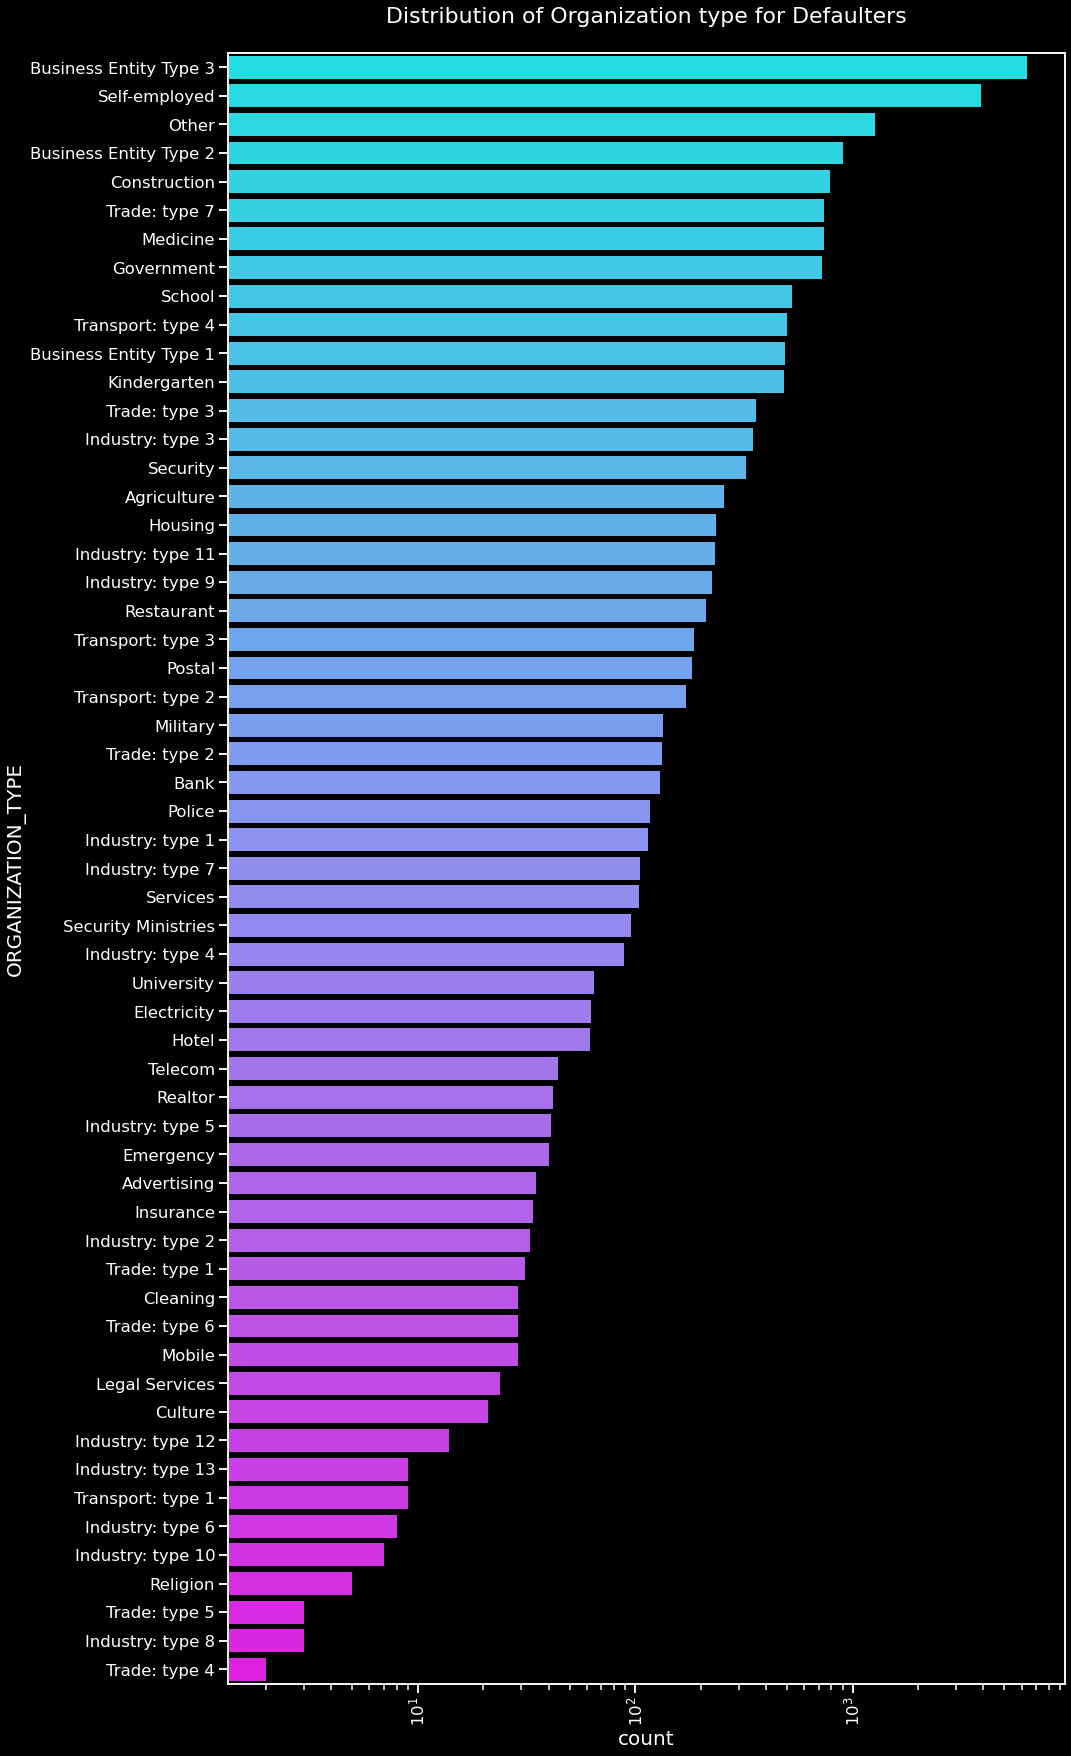

In [69]:
style.use('dark_background')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for Defaulters")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data= defaulters,y='ORGANIZATION_TYPE',order=defaulters['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

## Inference (Organisation type):

In case of Organisation type, Business entities have availed the highest number of loans with highest default and timely payments.

### Age (in Years) Variable w.r.t Gender who are Non-Defaulters

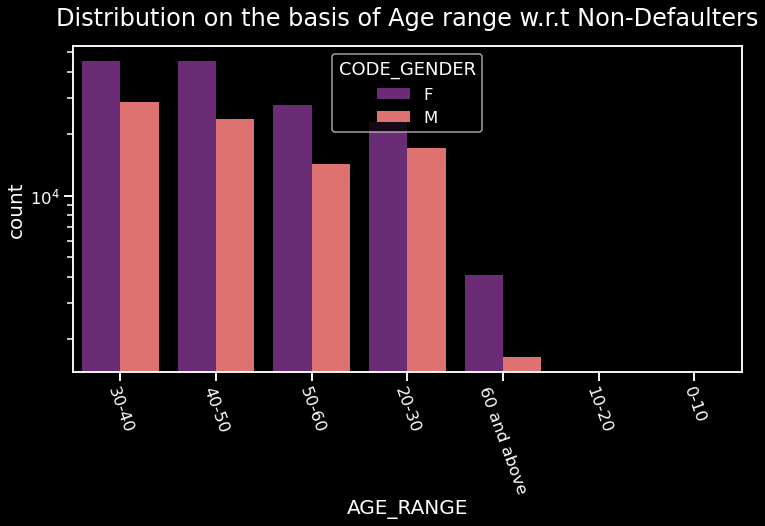

In [70]:
uniplot(non_defaulters, col='AGE_RANGE',title='Distribution on the basis of Age range w.r.t Non-Defaulters',hue='CODE_GENDER')

### Age (in Years) Variable w.r.t Gender who are Defaulters

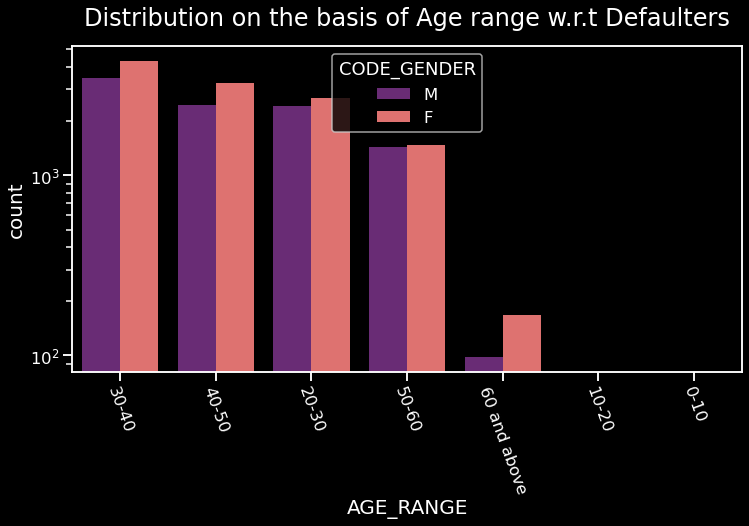

In [72]:
uniplot(defaulters, col='AGE_RANGE',title='Distribution on the basis of Age range w.r.t Defaulters',hue='CODE_GENDER')

## Inference (Age Range):

In this case, we can infer that the age group of 30-40 years avail the maximum number of loans; out of which females are the highest. Also, this age group tends to both default the highest and pay timely annuity.

### Education Variable w.r.t Gender who are Non-Defaulters

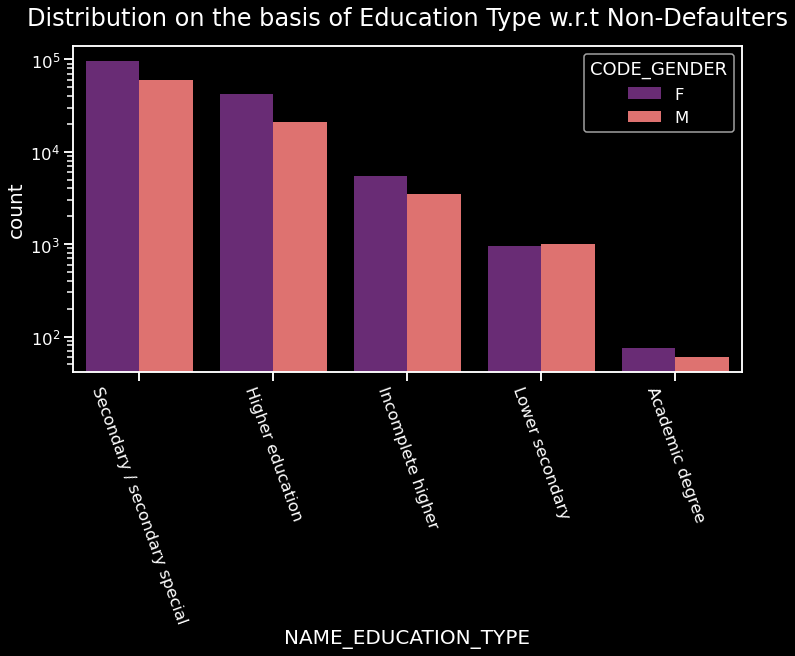

In [73]:
uniplot(non_defaulters, col='NAME_EDUCATION_TYPE',title='Distribution on the basis of Education Type w.r.t Non-Defaulters',hue='CODE_GENDER')

### Education Variable w.r.t Gender who are Defaulters

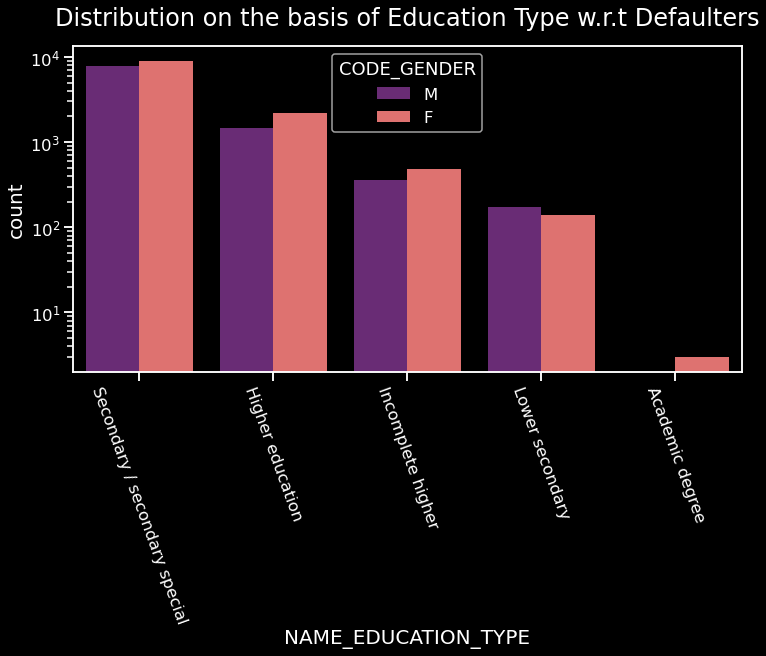

In [75]:
uniplot(defaulters, col='NAME_EDUCATION_TYPE',title='Distribution on the basis of Education Type w.r.t Defaulters',hue='CODE_GENDER')

## Inference (Education Type):

In this case, we can infer that the majority applicants atleast have a secondary education; out of which females are the highest. Also, this group tends to both default the highest and pay timely annuity.

# Correlation with Target Variable

## Using Graphical analysis (Box Plot)

### Credit Amount V/S Education Status (Non-defaulters)

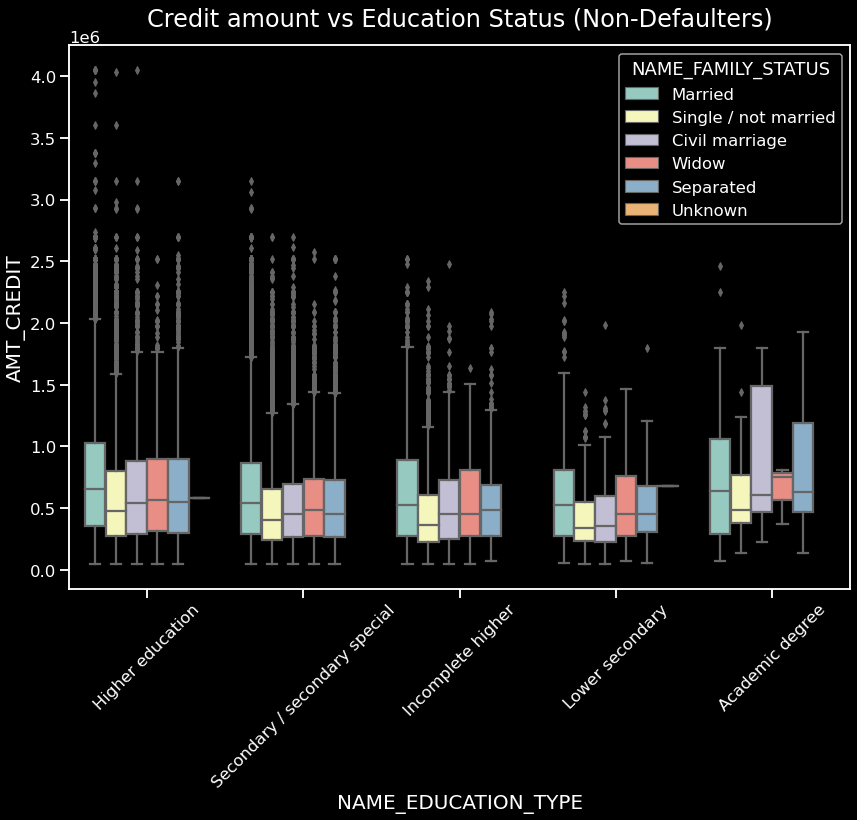

In [76]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
sns.boxplot(data =non_defaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status (Non-Defaulters)')
plt.show()

## Inference:

According to the boxplot above w.r.t applicants who are non-defaulters; 

1. Applicants who have higher education and are married, married under civil law, widows, or seperated have higher credit amounts. 
2. Applicants who have academic degree and are married under civil law or seperated have higher credit amounts amoung all education holders as majority applicants lie in the third quartile.

### Credit Amount V/S Education Status (Defaulters)


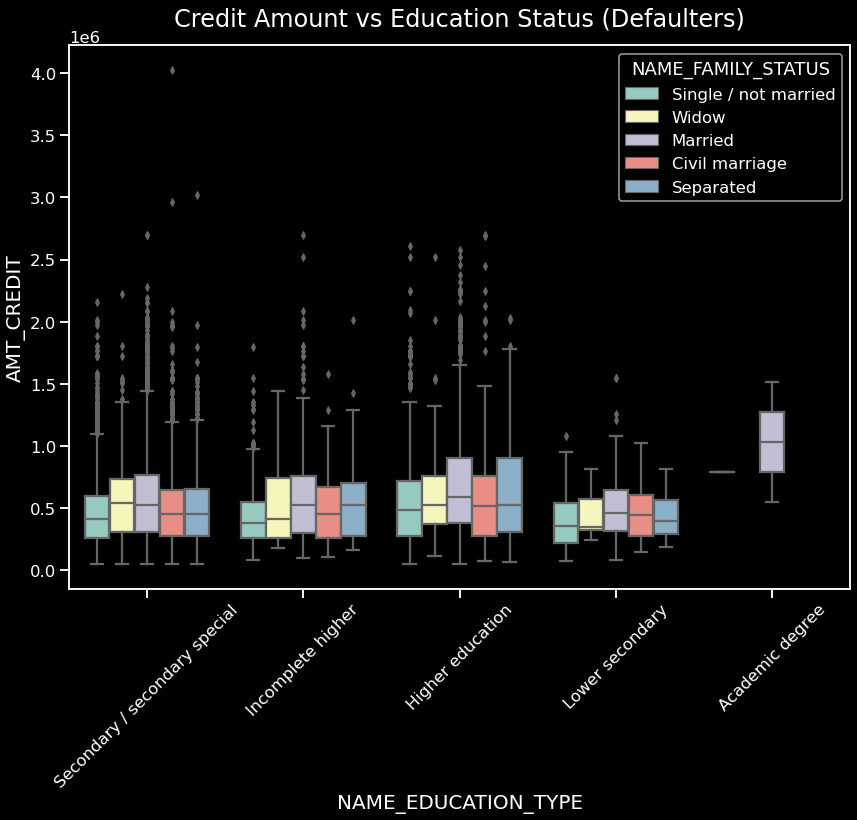

In [77]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
sns.boxplot(data =defaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status (Defaulters)')
plt.show()

## Inference:

According to the boxplot above w.r.t applicants who are Defaulters; 

1. Applicants who have higher education and are married or seperated have higher credit amounts and tend to default more. 
2. Applicants who have academic degree and are married have higher credit amounts amoung all education holders as majority applicants lie in the third quartile. Also, these applicants tend to default more compared to others.

### Income Amount V/S Education Status (Non-defaulters)

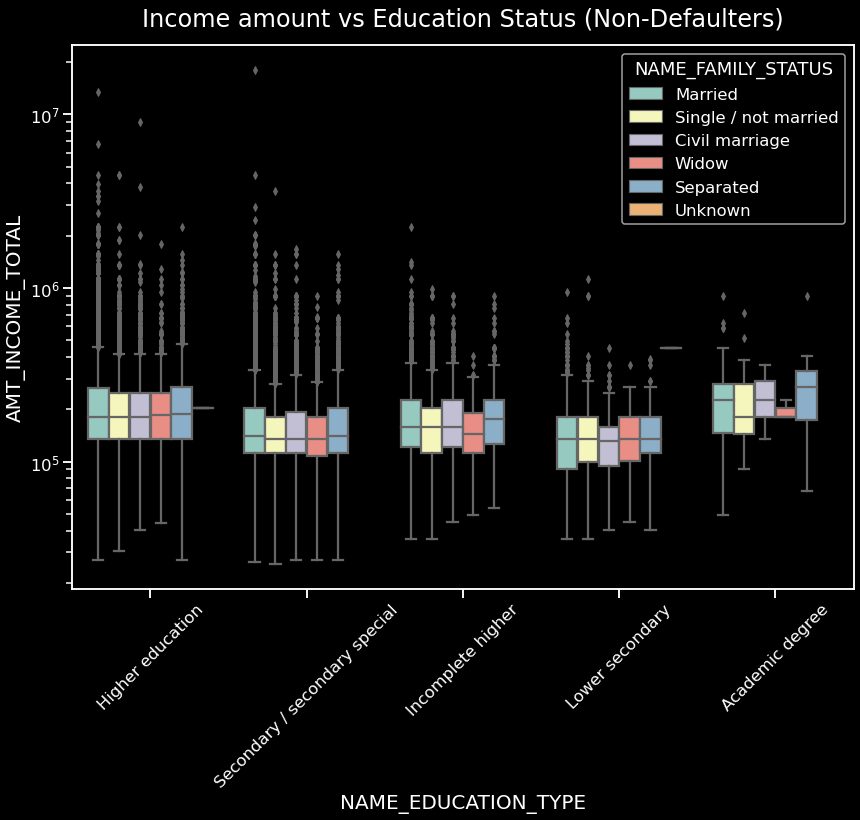

In [78]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =non_defaulters, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Non-Defaulters)')
plt.show()

## Inference:

According to the boxplot above w.r.t applicants who are Non-defaulters; 

1. Income of applicants with Higher education is mostly equal with family status. 
2. The graph contains many outliers in applicants with higher education and secondary education. 
3. Applicants who have an academic degree and are seperated have the highest Income; default the least.


### Income Amount V/S Education Status (Defaulters)

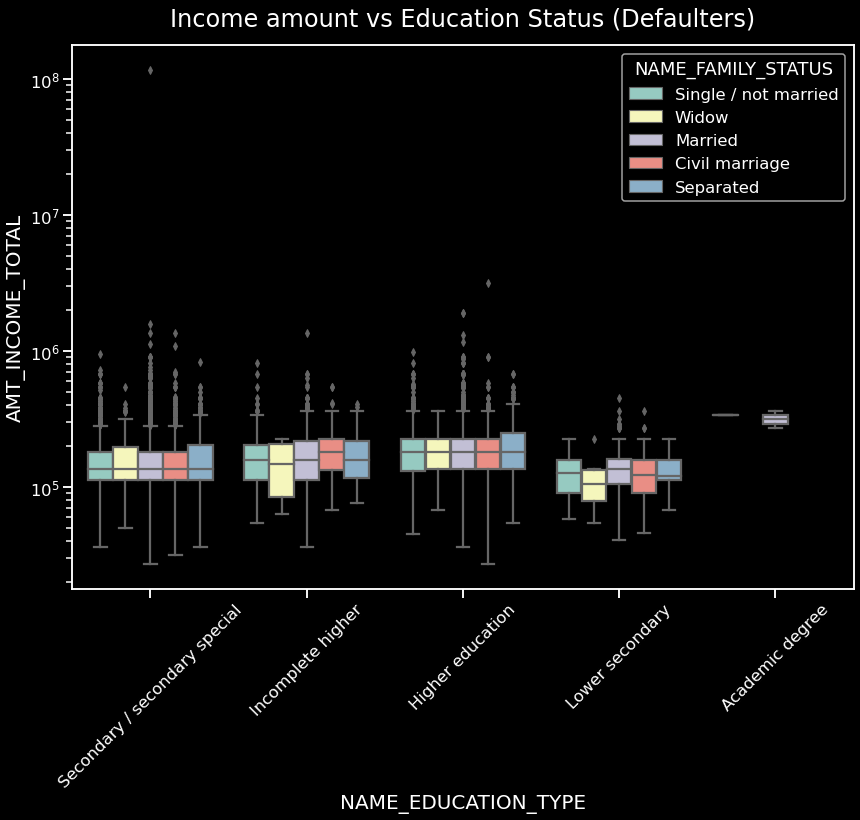

In [79]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =defaulters, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Defaulters)')
plt.show()

## Inference:

According to the boxplot above w.r.t applicants who are Defaulters; 

1. Income of married applicants with Secondary education have the most number of outliers. 
2. Applicants who have an academic degree and are married have the highest Income; default the most.


# Analyzing Previous data

In [80]:
# Reading Previous data

previous_data=pd.read_csv(r"E:\Vidya_DS\Credit EDA Case Study\previous_application.csv")
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Identifying missing values

In [81]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol1=previous_data.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [82]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
previous_data.drop(labels=emptycol1,axis=1,inplace=True)

previous_data.shape

(1670214, 22)

In [83]:
# Removing the column values of 'XNA' and 'XAP'

previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

previous_data.shape

(69635, 22)

## Merging the Application dataset with previous application dataset

In [84]:
combined_data=pd.merge(left=application_data,right=previous_data,how='inner',on='SK_ID_CURR',suffixes='_x')
combined_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


## Bivariate analysis

### Purpose of loan Variable

## Step Taken:

According to us, the variable: 'Purpose of loan' is important as this will help us analyse which loan category the company should focus on and which they should avoid. 

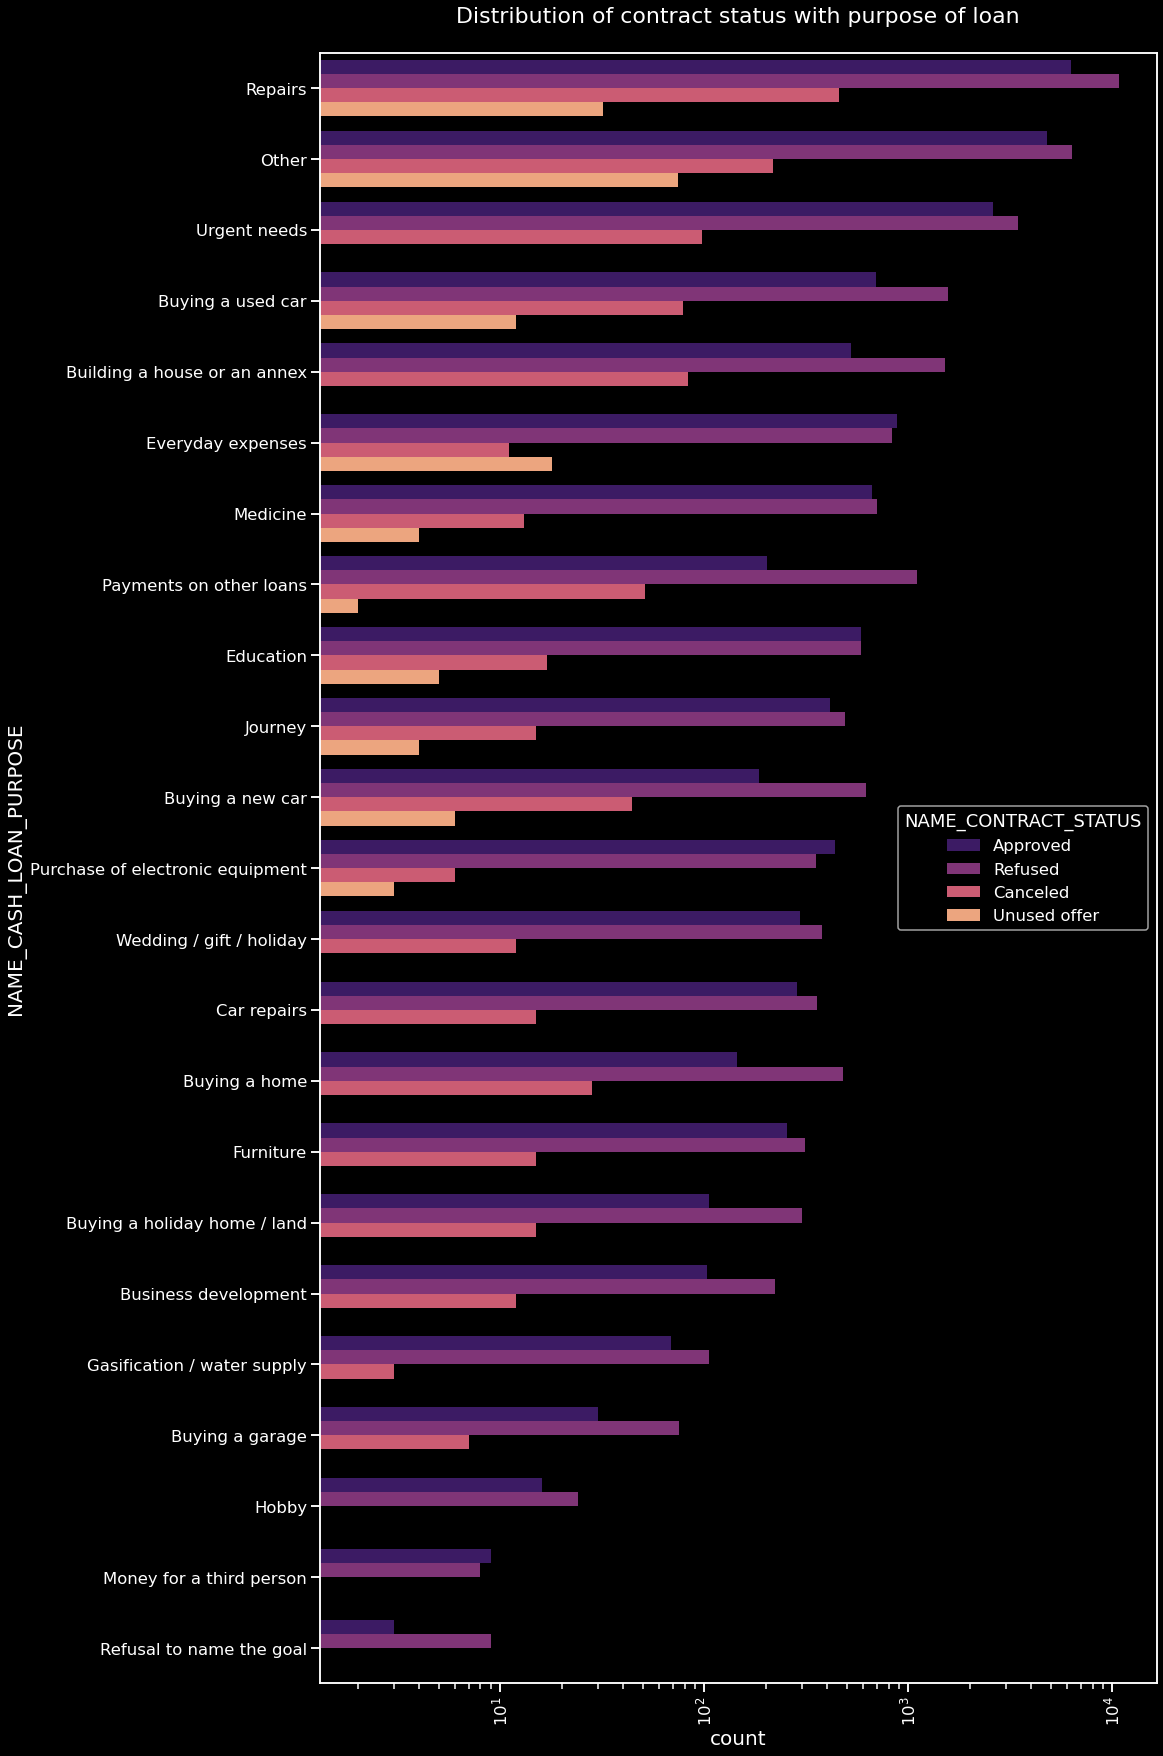

In [85]:
# Distribution of contract status with purpose of loan

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purpose of loan')
ax = sns.countplot(data = combined_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=combined_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')


## Inference:

As per analysis done above:

1. Majority applicants who have previously availed loans for the purpose of repairs have been rejected before.
2. Applicants who have availed other loans and are looking out for another, tend to get rejected by the company.
3. Applicants who have applied loans for the purpose of medicine and education, have equal chances of approval and rejections.



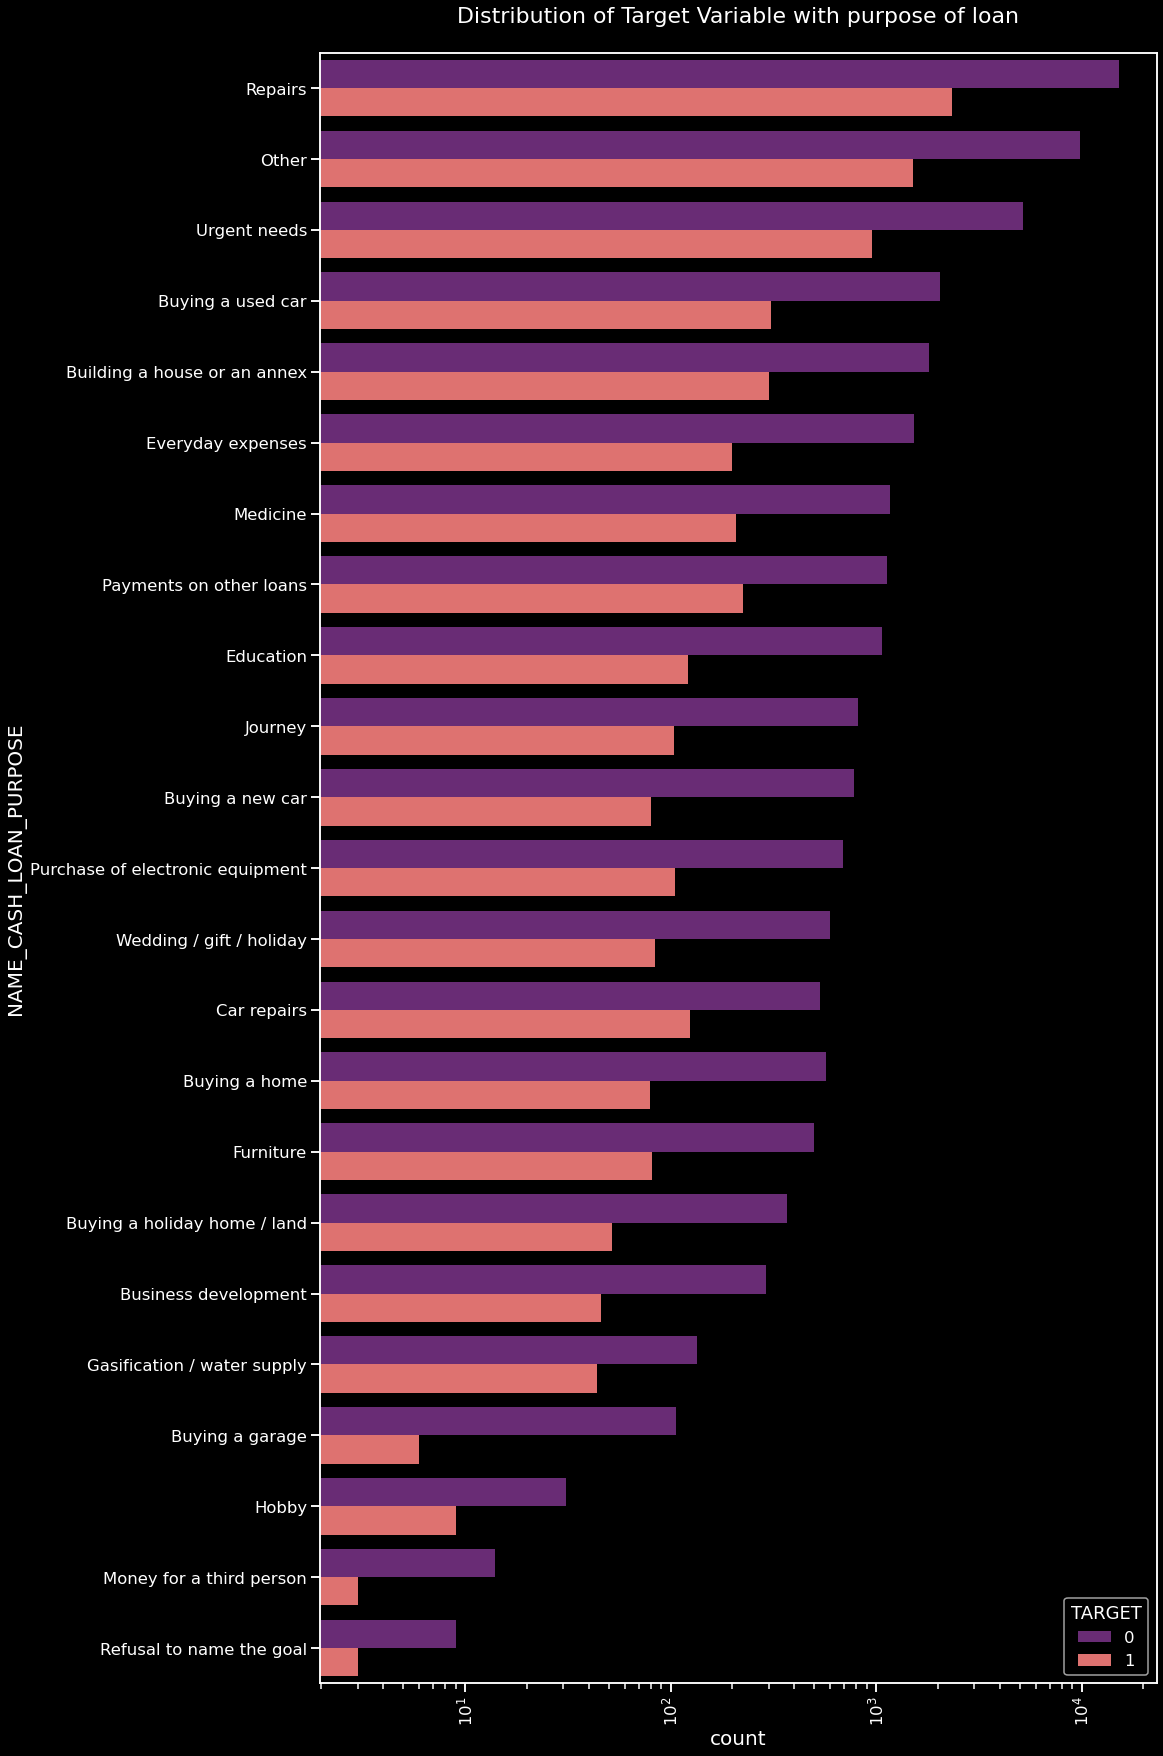

In [86]:
# Distribution of Target Variable with purpose of loan

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Target Variable with purpose of loan')
ax = sns.countplot(data = combined_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=combined_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

## Inference:

As per analysis done above:

1. Majority applicants who have availed loans for the purpose of repairs non-defaulters.
2. The highest number of applicants who have payment difficulties also from the 'Repairs' category.
3. Applicants whose purpose of loan is Education, Medicine and buying furniture have lower payment difficulties.


# Conclusion:

1. Analysis shows that females are both defaulters and non-defaulters, therefore; 'Gender' variable cannot be considered as a factor for loan providing companies to reject or approve loans.
2. The company should provide loans to applicants whose purpose of loan is education and medicine as they have lower payment difficulties.
3. The company can focus more on applicants who are married on the basis of civil law and have an academic degree as they tend to have less payment dificulties. These applicants can be give larger amounts of credit too.
4. The company can target applicants with education more than secondary and are not married/civil married as they tend to have less payment difficulties.
5. Applicants in the age group 60 and above tend to avail less loans and have the least difficulty in payment. The company should not focus more on this age group due to less revenue.
